
### T2 Data Analysis  

        Sean Keenan, PhD Physics  
        Quantum Memories Group, Heriot-Watt University, Edinburgh  
        2024  

In [1]:
import Function_files.data_functions as dat
from Function_files.fitting_functions import find_trigger, fit_exp_decay
from Function_files.math_functions import average_arrays
import Function_files.plotting_functions as plt
from Lifetime.T2 import T2_config as config_file

import os


##### Import Data  
        
        Load data sets & extract time and voltage data


In [2]:
# import config_file
config = config_file.config_params
# path to folders containing T1 data
path = os.path.join(config['root'], config['file'])
# extensions to look for in the folders
exts = config['extensions']
# indexes for data
di = config['data_indexes']
ti = config['trim_indexes']
# make labels from data indexes
labels = {key:di[key] for key in di.keys() if key != 'time'}

In [3]:
# populate folder and file lists
folder_list, file_list = dat.dir_interogate(path, extensions=exts)
# create dictionary for indexing folders and files
folder_index = dat.make_index_dict(folder_list)
file_index = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# lists of the data paths and metadata (text) paths
data_path_list = dat.search_paths(folder_list, file_list, [exts[0]])
metadata_path_list = dat.search_paths(folder_list, file_list, [exts[1]])
# extract the relevant data from the files
excel_sets = [dat.open_csv(os.path.join(path, data_path)) for data_path in data_path_list]
metadata = [dat.open_text(os.path.join(path, data_path)) for data_path in metadata_path_list]
# populate dictionary for extracting from the metadata
#test = dat.create_dict(os.path.join(path, metadata_path_list[0][0]), delimiter='=')

T2_0_0.csv
T2_0_1.csv
T2_0_2.csv
T2_0_3.csv
T2_0_4.csv
T2_0_5.csv
T2_0_6.csv
T2_0_7.csv
T2_0_8.csv
T2_0_9.csv
T2_0_10.csv
T2_0_11.csv
T2_0_12.csv
T2_0_13.csv
T2_0_14.csv
T2_0_notes.txt
T2_0_0.csv
T2_0_1.csv
T2_0_2.csv
T2_0_3.csv
T2_0_4.csv
T2_0_5.csv
T2_0_6.csv
T2_0_7.csv
T2_0_8.csv
T2_0_9.csv
T2_0_10.csv
T2_0_11.csv
T2_0_12.csv
T2_0_13.csv
T2_0_14.csv
T2_0_notes.txt


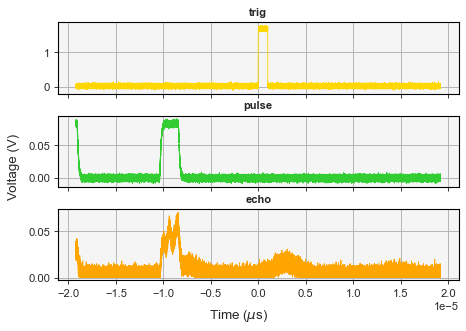

In [4]:
# plot channel data to check assignment
fig, ax = plt.plot_scope(excel_sets[0][:,di['time']], [excel_sets[0][:,di['trig']], excel_sets[0][:,di['pulse']], excel_sets[0][:,di['echo']]], titles= labels, multi=True)


##### Fine Tune Trigger Point

        Check the trigger index and adjust if neccesary
        

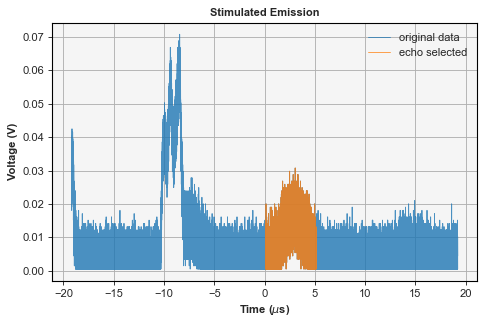

In [27]:
# find inex of the trigger
trig_indexes = [[find_trigger(trig_data[:,di['trig']], modifier=.9) for trig_data in excel_data] for excel_data in excel_sets]
ti['trig'] = trig_indexes[0][0]
# calculate the time step
dt = (excel_sets[0][0][:,di['time']][1] - excel_sets[0][0][:,di['time']][0])*1E6
# create offset beased on time step
ti['ramp'] = round(2/dt) + trig_indexes[0][0]
ti['off'] = round(0.6/dt)
ti['ref_off'] = round(0.6/dt) 

# plot transmitted and reference data to check the trigger index
fig, ax = plt.plot_T2_trigger(excel_sets[0][:,di['time']]*1E6, excel_sets[0][:,di['echo']], ti)

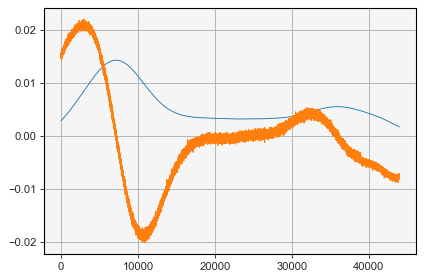

In [11]:
import numpy as np
import matplotlib.pyplot as mp
from scipy.signal import savgol_filter as svg

smoothed = fil.smooth_data(excel_sets[0][:,di['echo']][ti['trig']:ti['off']], 10000, 'gaussian')
mp.plot(smoothed)
mp.plot(np.diff(smoothed)*1E4)


##### Process Data  

        Trim the data sets and find initial starting parameters for fitting
        Fit to the data and take average fit values


In [7]:
# find start and stop indexes for the data (saves trying to fit to unnecesary data)
start_set = [[value + ti['off'] for value in trig_index] for trig_index in trig_indexes]

# create new arrays of cut data using start and stop indexes found
time_sets = [[data[:,di['time']][start:ti['ramp']] for data, start in zip(data_list, start_list)] for data_list, start_list in zip([excel_sets], start_set)]
trig_sets = [[data[:,di['trig']][start:ti['ramp']] for data, start in zip(data_list, start_list)] for data_list, start_list in zip([excel_sets], start_set)]
trans_sets = [[data[:,di['echo']][start:ti['ramp']] for data, start in zip(data_list, start_list)] for data_list, start_list in zip([excel_sets], start_set)]

# found initial start params for the fitting functions (minimum and maximum)
list_of_mins = [[min(trans) for trans in trans_lists] for trans_lists in trans_sets]
list_of_maxs = [[max(trans) for trans in trans_lists] for trans_lists in trans_sets]

# zip the fit data for the reference signal
data_zip = zip(time_sets, trans_sets,list_of_maxs,list_of_mins)

# fit to the transmitted data and average the fit
data_fit_sets = [[fit.fit_gauss(time, trans, params=(max_value, min_value)) for time, trans, max_value, min_value in zip(time_set, trans_set, max_set, min_set)] for time_set, trans_set, max_set, min_set in data_zip]
data_fit_avg = [mat.average_arrays(data_list) for data_list in data_fit_sets]

TypeError: gaussian() missing 2 required positional arguments: 'x_0' and 'sigma'